In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
def getDf():
    files = {}
    for size in [1000000, 1500000, 10000000, 15000000]:
        with open("../result/resultRustVarious_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'accesstime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        dfs[k] = df
    df = dfs['size1000000']
    for s in [1500000, 10000000, 15000000]:
        df = pd.concat([df, dfs["size{}".format(s)]])
        
    df.astype({ "size": "int32", "inittime": "int32", \
                "addtime": "int32", 'accesstime': "int32","totaltime": "int32",
              "method": 'category', "type": 'category'})
    return df

In [101]:
files = {}
for size in [1000000, 1500000, 10000000, 15000000]:
    with open("../result/resultRustVarious_{}.txt".format(size), "r") as f:
        files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

In [102]:
files

{'size1000000': [['datastructure',
   'method',
   'type',
   'size',
   'inittime',
   'addtime',
   'accesstime',
   'totaltime'],
  ['[RustVector]',
   '"memcpy"',
   '"Integer"',
   '1000000',
   '6352',
   '3149213',
   '237893305'],
  ['[RustVector]',
   '"memcpy"',
   '"Integer"',
   '1000000',
   '9995',
   '3164685',
   '239771832'],
  ['[RustVector]',
   '"memcpy"',
   '"Integer"',
   '1000000',
   '8708',
   '3196738',
   '238700246'],
  ['[RustVector]',
   '"memcpy"',
   '"Integer"',
   '1000000',
   '9645',
   '3108399',
   '237512285'],
  ['[RustVector]',
   '"memcpy"',
   '"Integer"',
   '1000000',
   '9550',
   '3278935',
   '239309814'],
  ['[RustVector]',
   '"memcpy"',
   '"String"',
   '1000000',
   '8901',
   '120533920',
   '5328708586'],
  ['[RustVector]',
   '"memcpy"',
   '"String"',
   '1000000',
   '11662',
   '115262370',
   '5328102990'],
  ['[RustVector]',
   '"memcpy"',
   '"String"',
   '1000000',
   '7525',
   '115514261',
   '5292339737'],
  ['[RustVec

In [99]:
df = getDf()

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [76]:
df_average = df.groupby(["method", "type", "size"]).mean().reset_index()

In [77]:
df_average

,method,type,size,inittime,addtime,totaltime
0,"""clone""","""Integer""",1000,5083.6,7161.8,1.119898e+05
1,"""clone""","""Integer""",10000,4817.8,26717.6,9.429648e+05
2,"""clone""","""Integer""",100000,8768.6,275971.2,9.208362e+06
3,"""clone""","""Integer""",1000000,10058.4,2574262.6,9.153676e+07
4,"""clone""","""String""",1000,4042.8,117582.4,7.580113e+06
5,"""clone""","""String""",10000,7057.4,1092491.8,7.477257e+07
6,"""clone""","""String""",100000,9169.6,10329454.8,7.427125e+08
7,"""clone""","""String""",1000000,9120.6,104709630.2,7.429445e+09
8,"""clone_from""","""Integer""",1000,4758.0,2716.6,1.037028e+05
9,"""clone_from""","""Integer""",10000,6180.2,26693.8,9.578888e+05


In [78]:
df_avg_int = df_average[df_average["type"] == '"Integer"']

In [79]:
df_avg_int

,method,type,size,inittime,addtime,totaltime
0,"""clone""","""Integer""",1000,5083.6,7161.8,111989.8
1,"""clone""","""Integer""",10000,4817.8,26717.6,942964.8
2,"""clone""","""Integer""",100000,8768.6,275971.2,9208362.0
3,"""clone""","""Integer""",1000000,10058.4,2574262.6,91536761.0
8,"""clone_from""","""Integer""",1000,4758.0,2716.6,103702.8
9,"""clone_from""","""Integer""",10000,6180.2,26693.8,957888.8
10,"""clone_from""","""Integer""",100000,8362.0,259383.0,9207733.2
11,"""clone_from""","""Integer""",1000000,8992.8,2546414.0,91520676.2
16,"""memcpy""","""Integer""",1000,5349.6,521.2,99873.2
17,"""memcpy""","""Integer""",10000,4545.4,23288.8,945356.4


In [80]:
df_avg_string = df_average[df_average["type"] == '"String"']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


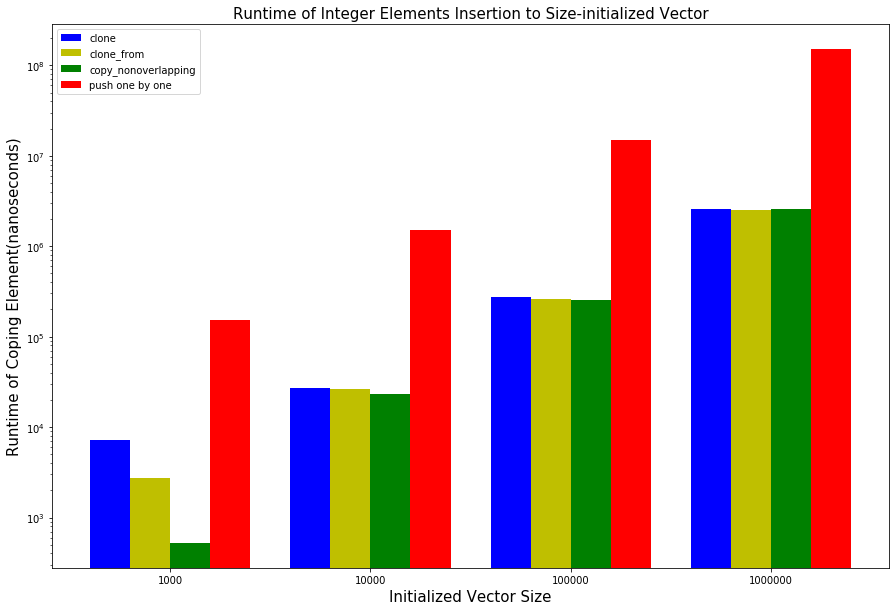

In [88]:
clone = df_avg_int[df_avg_int["method"] == '"clone"']
clone_from = df_avg_int[df_avg_int["method"] == '"clone_from"']
memcpy = df_avg_int[df_avg_int["method"] == '"memcpy"']
onebyone = df_avg_int[df_avg_int["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
label = np.sort(df_avg_int['size'].unique())
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
fig.savefig("rust_various_insertion_integer.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


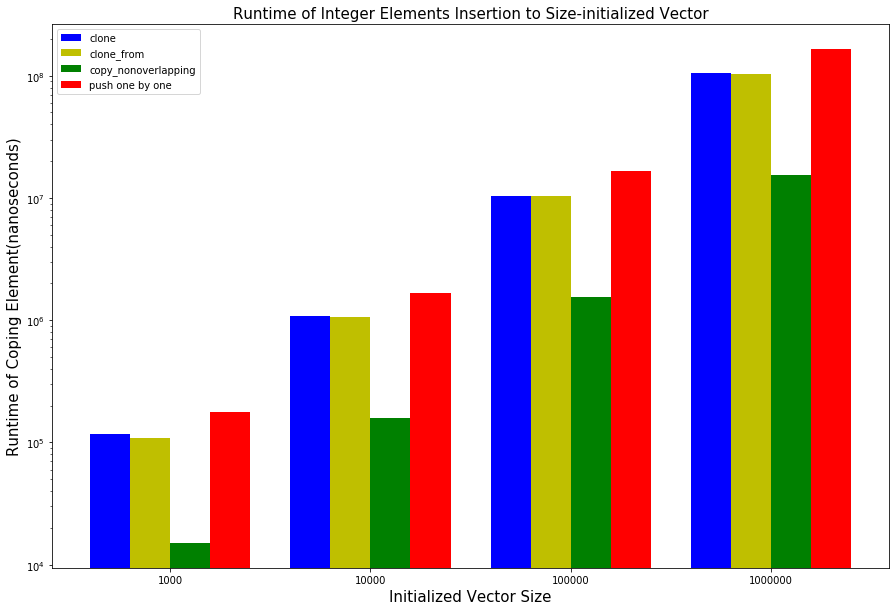

In [89]:
clone = df_avg_string[df_avg_string["method"] == '"clone"']
clone_from = df_avg_string[df_avg_string["method"] == '"clone_from"']
memcpy = df_avg_string[df_avg_string["method"] == '"memcpy"']
onebyone = df_avg_string[df_avg_string["method"] == '"onebyone"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg_int['size'].nunique())
b1 = ax.bar(idx - 2*w, clone["addtime"], width = w, color ='b', align = 'center')
b2 = ax.bar(idx - w, clone_from["addtime"], width = w, color ='y', align = 'center')
b3 = ax.bar(idx , memcpy['addtime'], width = w, color ='g', align = 'center')
b4 = ax.bar(idx + w, onebyone['addtime'], width = w, color ='r', align = 'center')
ax.set_xticks(idx - w/ 2)
ax.set_xticklabels(label)
ax.set_xlabel("Initialized Vector Size", fontsize = 15)
ax.set_ylabel("Runtime of Coping Element(nanoseconds)", fontsize = 15)
ax.set_title("Runtime of Integer Elements Insertion to Size-initialized Vector", fontsize = 15)
ax.legend((b1, b2, b3, b4), ("clone", "clone_from", "copy_nonoverlapping", "push one by one"))
ax.set_yscale('log')
fig.savefig("rust_various_insertion_string.eps")
plt.show()